In [ ]:
from tqdm.notebook import tqdm

from oumi.builders import build_tokenizer
from oumi.core.configs import ModelParams
from oumi.datasets.vision_language.cauldron import CauldronDataset

model_name = "meta-llama/Llama-3.2-11B-Vision-Instruct"
tokenizer = build_tokenizer(ModelParams(model_name=model_name))

In [3]:
all_possible_subsets = [
    "ai2d",
    "aokvqa",
    "chart2text",
    "chartqa",
    "clevr",
    "clevr_math",
    "cocoqa",
    "datikz",
    "diagram_image_to_text",
    "docvqa",
    "dvqa",
    "figureqa",
    "finqa",
    "geomverse",
    "hateful_memes",
    "hitab",
    "iam",
    "iconqa",
    "infographic_vqa",
    "intergps",
    "localized_narratives",
    "mapqa",
    "mimic_cgd",
    "multihiertt",
    "nlvr2",
    "ocrvqa",
    "okvqa",
    "plotqa",
    "raven",
    "rendered_text",
    "robut_sqa",
    "robut_wikisql",
    "robut_wtq",
    "scienceqa",
    "screen2words",
    "spot_the_diff",
    "st_vqa",
    "tabmwp",
    "tallyqa",
    "tat_qa",
    "textcaps",
    "textvqa",
    "tqa",
    "vistext",
    "visual7w",
    "visualmrc",
    "vqarad",
    "vqav2",
    "vsr",
    "websight",
]

In [4]:
# subsets_to_test = all_possible_subsets # More expensive

subsets_to_test = [
    "geomverse",
    "tat_qa",
    "diagram_image_to_text",
    "tqa",
    "spot_the_diff",
]

subsets_to_test = ["geomverse"]

[2025-02-03 19:25:03,055][oumi][rank0][pid:76299][MainThread][INFO]][base_map_dataset.py:82] Creating map dataset (type: CauldronDataset) dataset_name: 'None', dataset_path: 'None'...
[2025-02-03 19:25:05,359][oumi][rank0][pid:76299][MainThread][INFO]][base_map_dataset.py:486] Dataset Info:
	Split: train
	Version: 0.0.0
	Dataset size: 959091917
	Download size: 323746516
	Size: 1282838433 bytes
	Rows: 9303
	Columns: ['images', 'texts']
[2025-02-03 19:25:05,684][oumi][rank0][pid:76299][MainThread][INFO]][base_map_dataset.py:425] Loaded DataFrame with shape: (9303, 2). Columns:
images    object
texts     object
dtype: object
Number of examples in subset geomverse: 9303


                                              images  \
0  [{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\...   
1  [{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\...   
2  [{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\...   
3  [{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\...   
4  [{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFI

  0%|          | 0/9303 [00:00<?, ?it/s]

Example 0:


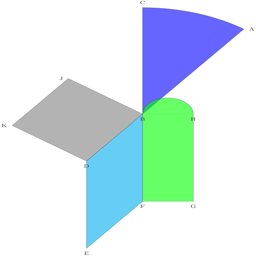

user: [<IMAGE_BINARY>, If the arc length of the ABC sector is 12.85, the area of the BDEF parallelogram is 108, the BFGH shape is a combination of a rectangle and a semi-circle, the length of the FG side is 6, the perimeter of the BFGH shape is 48, the area of the BJKD square is 121 and the angle DBF is vertical to CBA, compute the length of the BC side of the ABC sector. Assume $\pi=3.14$. Round computations to 2 decimal places.]
assistant: [The perimeter of the BFGH shape is 48 and the length of the FG side is 6, so $2 * OtherSide + 6 + \frac{6 * 3.14}{2} = 48$. So $2 * OtherSide = 48 - 6 - \frac{6 * 3.14}{2} = 48 - 6 - \frac{18.84}{2} = 48 - 6 - 9.42 = 32.58$. Therefore, the length of the BF side is $\frac{32.58}{2} = 16.29$. The area of the BJKD square is 121, so the length of the BD side is $\sqrt{121} = 11$. The lengths of the BF and the BD sides of the BDEF parallelogram are 16.29 and 11 and the area is 108 so the sine of the DBF angle is $\frac{108}{16.29 * 11} = 0.6$ and so th

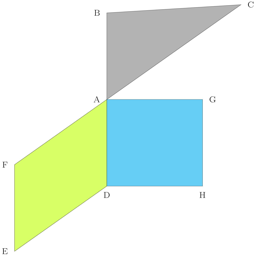

user: [<IMAGE_BINARY>, If the length of the AB side is 9, the length of the AC side is 16, the length of the AF side is 11, the area of the ADEF parallelogram is 78, the area of the AGHD square is 81 and the angle CAB is vertical to FAD, compute the length of the BC side of the ABC triangle. Round computations to 2 decimal places.]
assistant: [The area of the AGHD square is 81, so the length of the AD side is $\sqrt{81} = 9$. The lengths of the AF and the AD sides of the ADEF parallelogram are 11 and 9 and the area is 78 so the sine of the FAD angle is $\frac{78}{11 * 9} = 0.79$ and so the angle in degrees is $\arcsin(0.79) = 52.19$. The angle CAB is vertical to the angle FAD so the degree of the CAB angle = 52.19. For the ABC triangle, the lengths of the AB and AC sides are 9 and 16 and the degree of the angle between them is 52.19. Therefore, the length of the BC side is equal to $\sqrt{9^2 + 16^2 - (2 * 9 * 16) * \cos(52.19)} = \sqrt{81 + 256 - 288 * (0.61)} = \sqrt{337 - (175.68)} 

KeyboardInterrupt: 

In [5]:
import io

from PIL import Image

from oumi.core.types.conversation import Type

for subset in subsets_to_test:
    dataset = CauldronDataset(
        tokenizer=tokenizer,
        processor_name=model_name,
        subset=subset,
    )

    # Print basic information about the dataset
    num_examples_to_test = len(dataset)
    print(f"Number of examples in subset {subset}: {num_examples_to_test}\n")
    print(dataset.data.head(), "\n")

    proxy_token_len_user = dataset.data.texts.apply(
        lambda x: len(x[0]["user"].split())
    ).mean()

    proxy_token_len_assistant = dataset.data.texts.apply(
        lambda x: len(x[0]["assistant"].split())
    ).mean()

    print(f"Average token length for user messages: {proxy_token_len_user:.2f}")
    print(
        "Average token length for assistant messages:"
        f"{proxy_token_len_assistant:.2f}"
    )

    for i in tqdm(range(num_examples_to_test)):
        try:
            # Retrieve the i-th example (conversation)
            conversation = dataset.conversation(i)

            if i < 2:
                print(f"Example {i}:")

            for message in conversation.messages:
                # The `user` poses a question, regarding an image
                if message.role == "user":
                    img_content = message.content[0]
                    assert (
                        img_content.type == Type.IMAGE_BINARY
                    ), "Oumi encodes image content in binary for VQA-Small."

                    image = Image.open(io.BytesIO(img_content.binary)).resize(
                        (256, 256)
                    )
                    if i < 2:
                        display(image)
                if i < 2:
                    print(f"{message.role}: {message.content}")
            if i < 2:
                print("\n")
        except Exception as e:
            print(f"Failed to load example {i} of subset {subset}: {e}")